<a href="https://colab.research.google.com/github/elaine-zhang12/assignment2_ez/blob/main/Analysis_of_Improving_Pedestrian_Safety_Final_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of Improving Pedestrian Safety
**Authors: Elaine Zhang, Cheryl Bai, Eric Xie**

In [2]:
# import statements
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Cleaning

In [3]:
np.random.seed(42)

crash_data = pd.DataFrame()
# read the dataset and create a dataframe
for i in range(6):
  df = pd.read_csv("Crash_2020_2023_" + str(i) + ".csv")
  df_ped = df.loc[df["PED_NONPED"] == "Yes"]
  crash_data = pd.concat([crash_data, df_ped], ignore_index=True)

crash_data = crash_data.reset_index(drop=True)
crash_data.head()

,X,Y,OBJECTID,DOCUMENT_NBR,CRASH_YEAR,CRASH_DT,CRASH_MILITARY_TM,CRASH_SEVERITY,K_PEOPLE,A_PEOPLE,...,AREA_TYPE,SYSTEM,VSP,OWNERSHIP,PLAN_DISTRICT,MPO_NAME,RTE_NM,RNS_MP,NODE,OFFSET
0,-76.589129,37.213034,641773,203305319,2020,2020/10/22 03:59:59+00,1135,A,0,1,...,Urban,NonVDOT primary,5.0,3. City or Town Hwy Agency,Hampton Roads,HAMP,R-VA SR00143NB,27.07,646123.0,190.0
1,-76.709165,37.333128,641816,202645276,2020,2020/09/19 03:59:59+00,1330,A,0,1,...,Rural,VDOT Interstate,5.0,1. State Hwy Agency,Hampton Roads,HAMP,R-VA IS00064WB,236.33,NaN,NaN
2,-77.379622,37.214527,641989,203605036,2020,2020/12/22 05:00:00+00,1837,B,0,0,...,Urban,VDOT Interstate,1.0,1. State Hwy Agency,Crater,TCAT,R-VA IS00095NB DCR050.00X,0.31,709761.0,623.0
3,-77.221516,37.643252,641994,202605140,2020,2020/09/15 03:59:59+00,640,B,0,0,...,Rural,VDOT Secondary,1.0,1. State Hwy Agency,Richmond Regional,RICH,R-VA042SC00628NB,7.54,374391.0,554.0
4,-76.350701,36.822881,642032,202745098,2020,2020/09/29 03:59:59+00,1053,A,0,1,...,Urban,NonVDOT primary,5.0,3. City or Town Hwy Agency,Hampton Roads,HAMP,R-VA US00058EB,485.78,483072.0,1146.0


In [4]:
# select relevant columns for analysis
cols = ["X", "Y", "CRASH_YEAR", "CRASH_MILITARY_TM", "CRASH_SEVERITY", "PEDESTRIANS_KILLED", "PEDESTRIANS_INJURED", "WEATHER_CONDITION", "LIGHT_CONDITION",
        "ROADWAY_SURFACE_COND", "RELATION_TO_ROADWAY", "ROADWAY_ALIGNMENT", "ROADWAY_SURFACE_TYPE", "ROADWAY_DEFECT", "ROADWAY_DESCRIPTION", "INTERSECTION_TYPE",
        "TRAFFIC_CONTROL_TYPE", "TRFC_CTRL_STATUS_TYPE", "SCHOOL_ZONE", "FIRST_HARMFUL_EVENT", "FIRST_HARMFUL_EVENT_LOC", "ALCOHOL_NOTALCOHOL", "DISTRACTED_NOTDISTRACTED",
        "DROWSY_NOTDROWSY", "DRUG_NODRUG", "SPEED_NOTSPEED", "INTERSECTION_ANALYSIS", "SENIOR_NOTSENIOR", "YOUNG_NOTYOUNG", "MAINLINE_YN", "NIGHT", "AREA_TYPE",
        "SPEED_DIFF_MAX"]

crash_data = crash_data[cols]

In [5]:
# quick summary of the dataset
crash_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2336 entries, 0 to 2335
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   X                         2336 non-null   float64
 1   Y                         2336 non-null   float64
 2   CRASH_YEAR                2336 non-null   int64  
 3   CRASH_MILITARY_TM         2336 non-null   int64  
 4   CRASH_SEVERITY            2336 non-null   object 
 5   PEDESTRIANS_KILLED        2336 non-null   int64  
 6   PEDESTRIANS_INJURED       2336 non-null   int64  
 7   WEATHER_CONDITION         2336 non-null   object 
 8   LIGHT_CONDITION           2336 non-null   object 
 9   ROADWAY_SURFACE_COND      2336 non-null   object 
 10  RELATION_TO_ROADWAY       2336 non-null   object 
 11  ROADWAY_ALIGNMENT         2336 non-null   object 
 12  ROADWAY_SURFACE_TYPE      2336 non-null   object 
 13  ROADWAY_DEFECT            2336 non-null   object 
 14  ROADWAY_

In [6]:
# information about number of entires and features
print("The selected pedestrian related crash dataset has " + str(crash_data.shape[0]) + " entries.")
print("The selected pedestrian related crash dataset has " + str(crash_data.shape[1]) + " features.")

The selected pedestrian related crash dataset has 2336 entries.
The selected pedestrian related crash dataset has 33 features.


In [7]:
# check for missing values
if crash_data.isnull().sum().sum() > 0 :
  print("The dataset contains missing values.")
else:
  print("The dataset doesn't contain missing values.")

The dataset contains missing values.


In [8]:
# basic statistics about the dataset
crash_data.describe()

,X,Y,CRASH_YEAR,CRASH_MILITARY_TM,PEDESTRIANS_KILLED,PEDESTRIANS_INJURED,SPEED_DIFF_MAX
count,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000,168.000000
mean,-77.524688,37.795487,2021.306507,1487.613014,0.098031,0.950771,10.607143
std,1.224378,0.817264,1.108376,593.869523,0.300286,0.397712,9.429877
min,-83.548218,36.555105,2020.000000,0.000000,0.000000,0.000000,1.000000
25%,-77.534302,37.057300,2020.000000,1107.750000,0.000000,1.000000,5.000000
50%,-77.355791,37.545139,2021.000000,1634.000000,0.000000,1.000000,6.000000
75%,-76.753490,38.778493,2022.000000,1936.250000,0.000000,1.000000,11.250000
max,-75.361560,39.279324,2023.000000,2359.000000,2.000000,7.000000,65.000000


In [9]:
# rename variables
crash_data = crash_data.rename(columns={'X': 'longitude', 'Y': 'latitude'})

In [10]:
crash_data['CRASH_SEVERITY'].value_counts()

B    1223
A     667
K     229
C     217
Name: CRASH_SEVERITY, dtype: int64

## Data Discovery

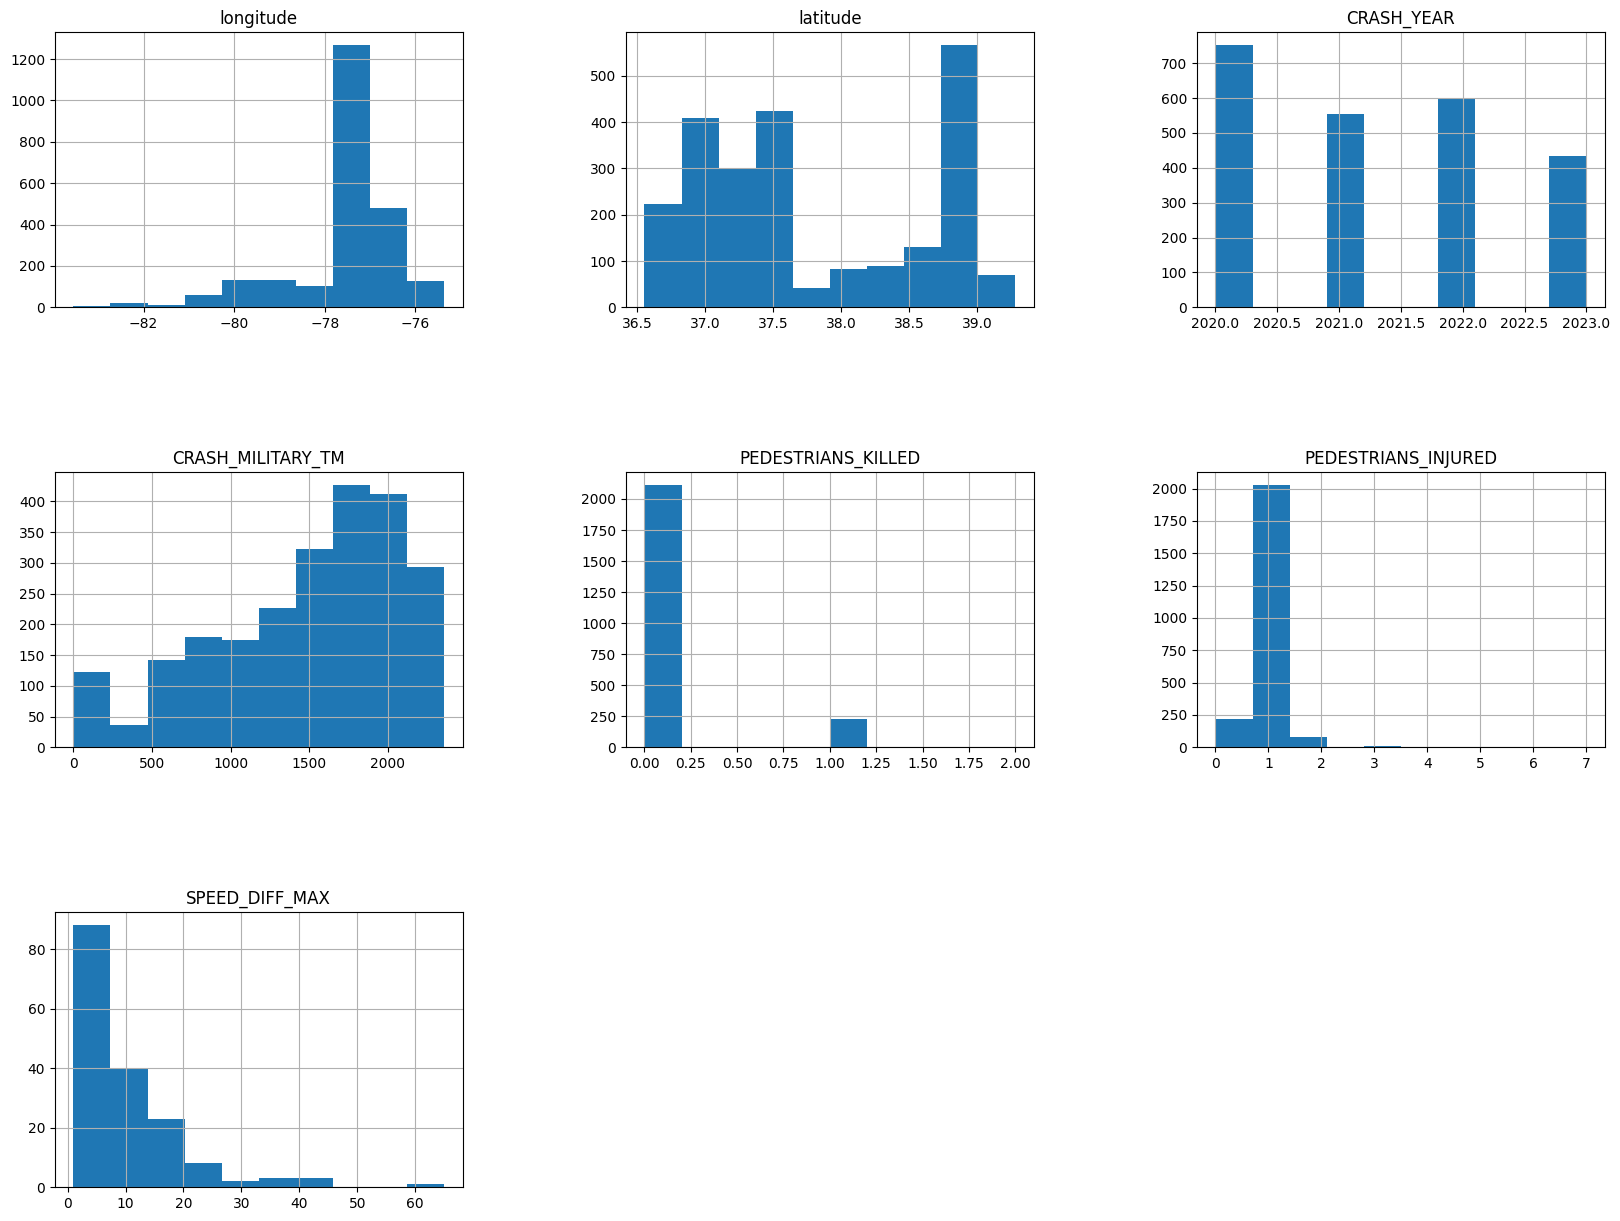

In [11]:
# plotting the numerical features spread
crash_data.hist(bins = 10, figsize = (20, 15))
plt.subplots_adjust(wspace = 0.4,hspace = 0.6)
plt.show()

In [12]:
from scipy.stats import chi2_contingency
corr_data = crash_data.drop(columns=['longitude', 'latitude', 'CRASH_MILITARY_TM', 'CRASH_YEAR'])
# https://www.geeksforgeeks.org/how-to-calculate-cramers-v-in-python/# used this source to code cramer's
# to create a correlation matrix with categorical and numerical variables
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    minimum_dimension = min(confusion_matrix.shape)-1
    return np.sqrt(phi2 / minimum_dimension)

cramer_matrix = pd.DataFrame(index=corr_data.columns, columns=corr_data.columns)
for i in corr_data.columns:
    for j in corr_data.columns:
        cramer_matrix.loc[i,j] = cramers_v(crash_data[i], crash_data[j])

<ipython-input-12-7e3dcf18c9c7>:11: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2 / minimum_dimension)
<ipython-input-12-7e3dcf18c9c7>:11: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2 / minimum_dimension)


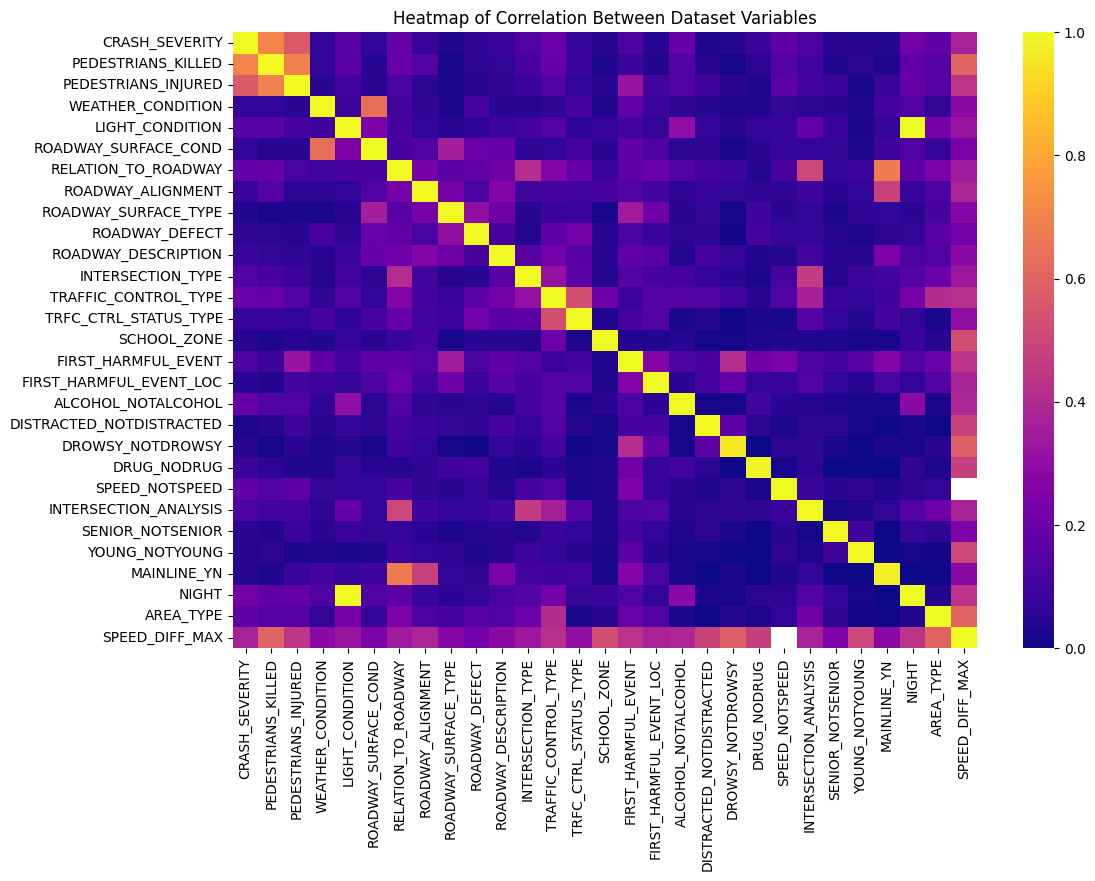

In [13]:
plt.figure(figsize=(12, 8))
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(cramer_matrix.astype(float), annot=False, cmap="plasma")
plt.title("Heatmap of Correlation Between Dataset Variables")
plt.show()

In [14]:
! pip install basemap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 860.7/860.7 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 15.0 MB/s eta 0:00:00


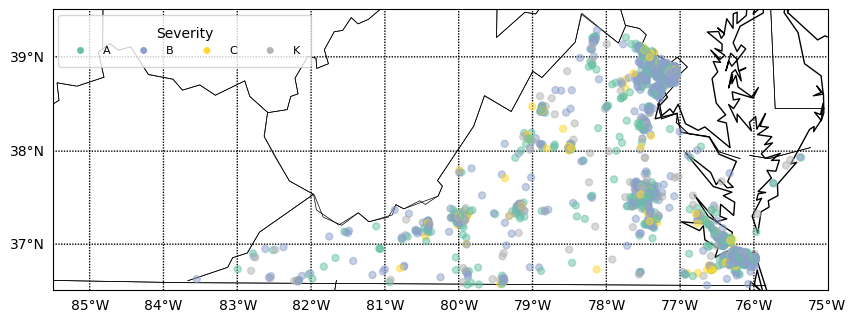

In [15]:
# plotting the crash severity by longitude and latitude to look at geographic effects
from math import nan
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.lines import Line2D

plt.figure(figsize=(10, 6))
severity_mapping = {'A': 1, 'B': 2, 'C': 3, 'K': 4}

longitude = crash_data['longitude'].tolist()
latitude = crash_data['latitude'].tolist()
severities = crash_data['CRASH_SEVERITY'].map(severity_mapping).tolist()
m = Basemap(projection='merc', resolution='l', llcrnrlat=36.5, urcrnrlat=39.5, llcrnrlon=-85.5, urcrnrlon=-75.0)

categorical_colormap = plt.get_cmap('Set2', len(severity_mapping))
m.drawcoastlines()
m.drawstates()
m.drawparallels(range(36, 40, 1), labels=[1,0,0,0])
m.drawmeridians(range(-85, -74, 1), labels=[0,0,0,1])
x, y = m(longitude, latitude)
m.scatter(x, y, c=severities, cmap=categorical_colormap, marker='o', s=25, alpha=0.5, zorder=5)

l1 = plt.scatter([],[], s=25, edgecolors='none', c='#66c2a5')
l2 = plt.scatter([],[], s=25, edgecolors='none', c='#8da0cb')
l3 = plt.scatter([],[], s=25, edgecolors='none', c='#ffd92f')
l4 = plt.scatter([],[], s=25, edgecolors='none', c='#b3b3b3')

labels = ["A", "B", "C", "K"]
leg = plt.legend([l1, l2, l3, l4], labels, ncol=4, frameon=True, fontsize=8,
                 handlelength=2, loc='upper left', borderpad=1, handletextpad=1, title='Severity', scatterpoints=1)

plt.show()

## Data Preparation

In [29]:
crash_data.columns

Index(['longitude', 'latitude', 'CRASH_YEAR', 'CRASH_MILITARY_TM',
       'CRASH_SEVERITY', 'PEDESTRIANS_KILLED', 'PEDESTRIANS_INJURED',
       'WEATHER_CONDITION', 'LIGHT_CONDITION', 'ROADWAY_SURFACE_COND',
       'RELATION_TO_ROADWAY', 'ROADWAY_ALIGNMENT', 'ROADWAY_SURFACE_TYPE',
       'ROADWAY_DEFECT', 'ROADWAY_DESCRIPTION', 'INTERSECTION_TYPE',
       'TRAFFIC_CONTROL_TYPE', 'TRFC_CTRL_STATUS_TYPE', 'SCHOOL_ZONE',
       'FIRST_HARMFUL_EVENT', 'FIRST_HARMFUL_EVENT_LOC', 'ALCOHOL_NOTALCOHOL',
       'DISTRACTED_NOTDISTRACTED', 'DROWSY_NOTDROWSY', 'DRUG_NODRUG',
       'SPEED_NOTSPEED', 'INTERSECTION_ANALYSIS', 'SENIOR_NOTSENIOR',
       'YOUNG_NOTYOUNG', 'MAINLINE_YN', 'NIGHT', 'AREA_TYPE',
       'SPEED_DIFF_MAX'],
      dtype='object')

In [30]:
# split the data into train set, validation set and test set
from sklearn.model_selection import train_test_split

drop_columns = ["CRASH_MILITARY_TM", "CRASH_SEVERITY", 'PEDESTRIANS_KILLED', 'PEDESTRIANS_INJURED']

drop_columns = [col for col in drop_columns if col in crash_data.columns]

X = crash_data.drop(columns=drop_columns)
y = crash_data["CRASH_SEVERITY"].copy()
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.1, random_state=42)

In [31]:
# separate into numerical and categorical
crash_num = X_train.select_dtypes(include=[np.number])
crash_cat = X_train.select_dtypes(exclude=[np.number])
num_attribs = list(crash_num)
cat_attribs = list(crash_cat)

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# transformation pipeline for numerical data
num_pipeline = Pipeline([
    ("std_scaler", StandardScaler()),
    ('imputer', SimpleImputer(strategy='median'))
])

# full pipeline that one hot encodes the categorical variables
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(handle_unknown="infrequent_if_exist"), cat_attribs),
])

## Models

### Multiclass Classifiers

In [33]:
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import OneHotEncoder

# attempt at a basic neural network
X_train_prepared = full_pipeline.fit_transform(X_train)
X_val_prepared = full_pipeline.transform(X_val)
X_test_prepared = full_pipeline.transform(X_test)

optimizer = tf.keras.optimizers.AdamW(learning_rate=0.01, weight_decay=0.001)

my_model = keras.Sequential()

my_model.add(keras.layers.InputLayer(input_shape=(X_train_prepared.shape[1],)))
my_model.add(keras.layers.Dense(300, activation="tanh"))
my_model.add(keras.layers.Dense(100, activation="tanh"))
my_model.add(keras.layers.Dense(10, activation="tanh"))
my_model.add(keras.layers.Dense(4, activation="softmax"))

my_model.compile(loss="categorical_crossentropy",
                 optimizer=optimizer,
                 metrics=["accuracy"])

encoder = OneHotEncoder(sparse=False)
y_train_encoded = encoder.fit_transform(y_train.to_numpy().reshape(-1, 1))
y_val_encoded = encoder.transform(y_val.to_numpy().reshape(-1, 1))
y_test_encoded = encoder.transform(y_test.to_numpy().reshape(-1, 1))

my_model.fit(X_train_prepared, y_train_encoded, epochs=50, validation_data=(X_val_prepared, y_val_encoded))
results = my_model.evaluate(X_test_prepared, y_test_encoded)
print("Loss on test set: ", results[0])
print("Accuracy on test set: ", results[1])

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


53/53 [==============================] - 3s 24ms/step - loss: 1.2487 - accuracy: 0.4920 - val_loss: 1.1318 - val_accuracy: 0.5348
Epoch 2/50
53/53 [==============================] - 1s 14ms/step - loss: 1.1405 - accuracy: 0.5175 - val_loss: 1.0911 - val_accuracy: 0.5348
Epoch 3/50
53/53 [==============================] - 1s 12ms/step - loss: 1.1123 - accuracy: 0.5140 - val_loss: 1.0902 - val_accuracy: 0.5348
Epoch 4/50
53/53 [==============================] - 1s 18ms/step - loss: 1.0952 - accuracy: 0.5413 - val_loss: 1.0901 - val_accuracy: 0.5401
Epoch 5/50
53/53 [==============================] - 1s 15ms/step - loss: 1.0854 - accuracy: 0.5396 - val_loss: 1.0869 - val_accuracy: 0.5722
Epoch 6/50
53/53 [==============================] - 1s 11ms/step - loss: 1.0940 - accuracy: 0.5384 - val_loss: 1.0903 - val_accuracy: 0.5561
Epoch 7/50
53/53 [==============================] - 1s 11ms/step - loss: 1.0824 - accuracy: 0.5419 - val_loss: 1.1055 - val_accuracy: 0.5401
Epoch 8/50
53/53 [======

In [34]:
# trying xgboost
from sklearn.metrics import accuracy_score
import xgboost as xgb
params = {
    'objective': 'multi:softmax', # Multiclass classification
    'eval_metric': 'merror',  # Evaluation metric
    'eta': 0.05,  # Learning rate
    'max_depth': 7,  # Maximum depth of a tree
    'min_child_weight': 100,  # Minimum sum of instance weight needed in a child
    'gamma': 0.05,  # Minimum loss reduction required to make a further partition on a leaf node
    'alpha': 1,  # L1 regularization term on weights
}

X_train_prepared = full_pipeline.fit_transform(X_train)
X_val_prepared = full_pipeline.transform(X_val)
X_test_prepared = full_pipeline.transform(X_test)

label_mapping = {'A': 0, 'B': 1, 'C': 2, 'K': 3}
y_train_mapped = y_train.map(label_mapping)
y_val_mapped = y_val.map(label_mapping)
y_test_mapped = y_test.map(label_mapping)

model = xgb.XGBClassifier(**params)
model.fit(X_train_prepared, y_train_mapped)
y_pred = model.predict(X_test_prepared)
accuracy = accuracy_score(y_test_mapped, y_pred)
print(accuracy)

0.5534188034188035


Original Accuracy: 0.5534188034188035

Permutation Importance:
longitude: 0.03632478632478637
WEATHER_CONDITION: 0.0
LIGHT_CONDITION: 0.0
ROADWAY_SURFACE_COND: 0.0
RELATION_TO_ROADWAY: 0.0
ROADWAY_ALIGNMENT: 0.0
ROADWAY_SURFACE_TYPE: 0.0
ROADWAY_DEFECT: 0.0
ROADWAY_DESCRIPTION: 0.0
INTERSECTION_TYPE: 0.0
TRAFFIC_CONTROL_TYPE: 0.0
TRFC_CTRL_STATUS_TYPE: 0.0
SCHOOL_ZONE: 0.0
FIRST_HARMFUL_EVENT: 0.0
FIRST_HARMFUL_EVENT_LOC: 0.0
ALCOHOL_NOTALCOHOL: 0.0
DISTRACTED_NOTDISTRACTED: 0.0
DROWSY_NOTDROWSY: 0.0
DRUG_NODRUG: 0.0
SPEED_NOTSPEED: 0.0
INTERSECTION_ANALYSIS: 0.0
SENIOR_NOTSENIOR: 0.0
YOUNG_NOTYOUNG: 0.0
MAINLINE_YN: 0.0
NIGHT: 0.0
AREA_TYPE: 0.0
SPEED_DIFF_MAX: 0.0
CRASH_YEAR: -0.0004985754985754968
latitude: -0.0029914529914529695

Number of features: 29


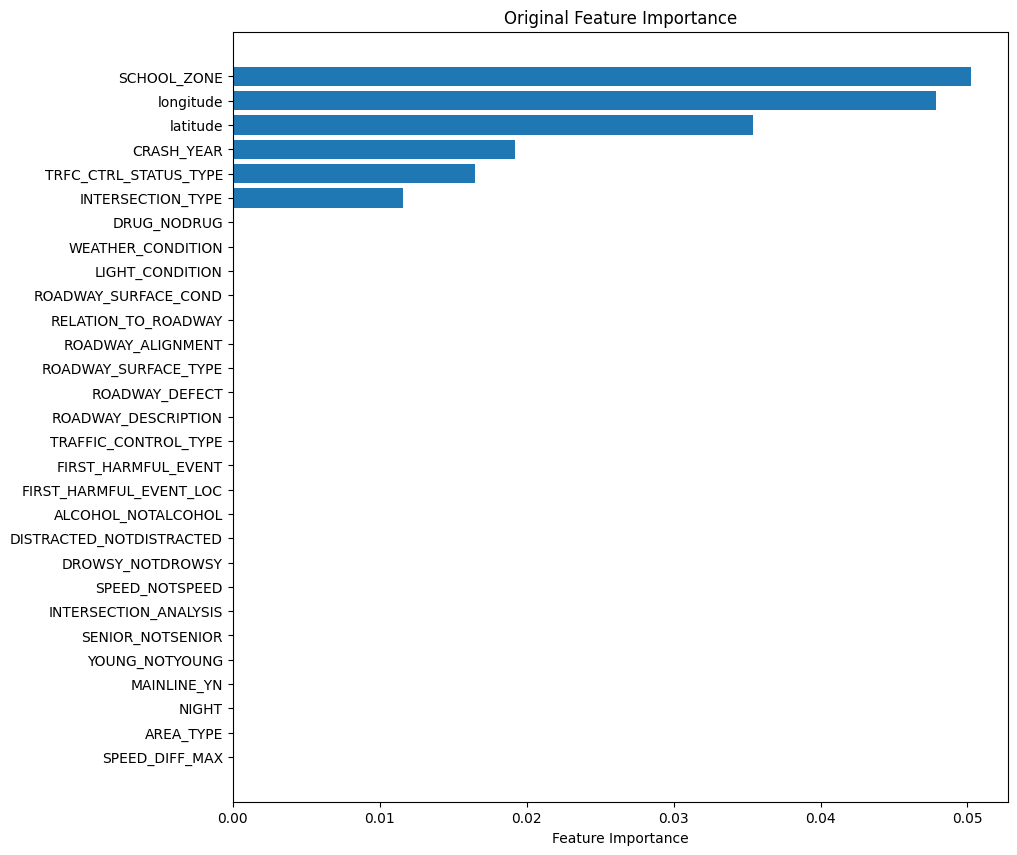

In [22]:
#Permutation Importance
from sklearn.inspection import permutation_importance

#Run initial train
model = xgb.XGBClassifier(**params)
model.fit(X_train_prepared, y_train_mapped)
y_pred = model.predict(X_test_prepared)
accuracy = accuracy_score(y_test_mapped, y_pred)
print("Original Accuracy:", accuracy)

X_test_dense = X_test_prepared.toarray()

#Calculate importance
perm_importance = permutation_importance(model, X_test_dense, y_test_mapped, n_repeats=30, random_state=42)
importance_scores = perm_importance.importances_mean

feature_importance = list(zip(X_train.columns, importance_scores))

#Sort features by importance
feature_importance.sort(key=lambda x: x[1], reverse=True)
print("\nPermutation Importance:")
for feature, importance in feature_importance:
    print(f"{feature}: {importance}")

#Feature importances
feature_importances = model.feature_importances_
indices = feature_importances.argsort()

print("\nNumber of features:", len(X_train.columns))
valid_indices = indices[indices < len(X_train.columns)]

#Plot feature importances using valid indices
plt.figure(figsize=(10, 10))
plt.barh(range(len(valid_indices)), feature_importances[valid_indices])
plt.yticks(range(len(valid_indices)), X_train.columns[valid_indices])
plt.xlabel('Feature Importance')
plt.title('Original Feature Importance')
plt.show()

In [35]:
from sklearn.metrics import classification_report

print(y_test.shape)
print(classification_report(y_test_mapped, y_pred))

(468,)
              precision    recall  f1-score   support

           0       0.36      0.29      0.32       129
           1       0.61      0.87      0.72       253
           2       0.00      0.00      0.00        38
           3       0.00      0.00      0.00        48

    accuracy                           0.55       468
   macro avg       0.24      0.29      0.26       468
weighted avg       0.43      0.55      0.48       468



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
# trying random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score

X_train_prepared = full_pipeline.fit_transform(X_train)
X_val_prepared = full_pipeline.transform(X_val)
X_test_prepared = full_pipeline.transform(X_test)

rfc = RandomForestClassifier(max_depth= 15, max_features= None, min_samples_leaf= 12, min_samples_split= 9, n_estimators= 44)

rfc.fit(X_train_prepared, y_train)
y_pred = rfc.predict(X_test_prepared)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy", accuracy)
print(classification_report(y_test, y_pred))

Accuracy 0.5854700854700855
              precision    recall  f1-score   support

           A       0.42      0.40      0.41       129
           B       0.65      0.86      0.74       253
           C       0.00      0.00      0.00        38
           K       0.57      0.08      0.15        48

    accuracy                           0.59       468
   macro avg       0.41      0.34      0.32       468
weighted avg       0.52      0.59      0.53       468



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

rfc = RandomForestClassifier()

param_dist = {
    'n_estimators': randint(10, 300),
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['sqrt', 'log2', None]
}

random_search = RandomizedSearchCV(rfc, param_distributions=param_dist, n_iter=10, cv=5, random_state=42)

random_search.fit(X_train_prepared, y_train)

print("Best Hyperparameters:", random_search.best_params_)

Best Hyperparameters: {'max_depth': 15, 'max_features': None, 'min_samples_leaf': 12, 'min_samples_split': 9, 'n_estimators': 44}


Number of features: 29


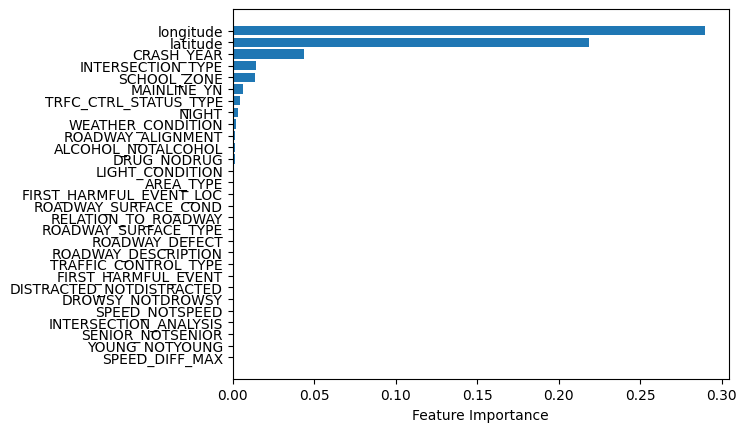

In [41]:
# CONSIDER PERMUTATION IMPORTANCE???
feature_importances = rfc.feature_importances_
indices = feature_importances.argsort()

print("Number of features:", len(X_train.columns))
valid_indices = indices[indices < len(X_train.columns)]

# Plot feature importances using valid indices
plt.barh(range(len(valid_indices)), feature_importances[valid_indices])
plt.yticks(range(len(valid_indices)), X_train.columns[valid_indices])
plt.xlabel('Feature Importance')
plt.show()

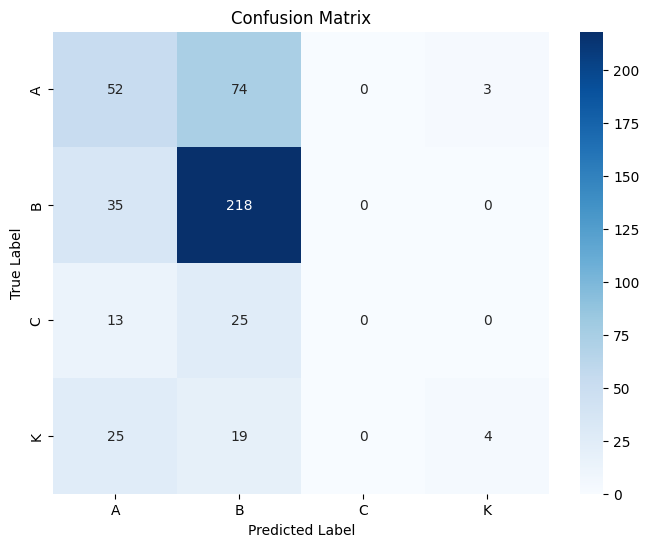

In [42]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# look at a confusion matrix for the results of the random forest classifier
# It looks like the majority class is B and it also heavily predicts B, so not much learning

class_labels = ['A', 'B', 'C', 'K']
label_to_num = {label: i for i, label in enumerate(class_labels)}
y_test_numeric = [label_to_num[label] for label in y_test]
y_pred_numeric = [label_to_num[label] for label in y_pred]

cm = confusion_matrix(y_test_numeric, y_pred_numeric)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [43]:
# One vs Onr classifier with SVM
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import SVC

svm_classifier = OneVsOneClassifier(SVC(kernel='linear'))
svm_classifier.fit(X_train_prepared, y_train)
y_pred = svm_classifier.predict(X_test_prepared)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5491452991452992


In [44]:
# One vs Rest classifier with SVM
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

svm_classifier = OneVsRestClassifier(SVC(kernel='linear'))
svm_classifier.fit(X_train_prepared, y_train)
y_pred = svm_classifier.predict(X_test_prepared)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5683760683760684


### Binary Classifiers

Attempt at classifying a severe crash versus a non severe crash. 1 means SEVERE and 0 means NON-SERIOUS.

In [45]:
# Predict fatal vs non-serious
# 1 is SEVERE, 0 is NON-SERIOUS

crash_two_classes = crash_data.copy()
crash_two_classes.loc[crash_two_classes['CRASH_SEVERITY'] == 'K', 'CRASH_SEVERITY'] = 1
crash_two_classes.loc[crash_two_classes['CRASH_SEVERITY'] == 'A', 'CRASH_SEVERITY'] = 1
crash_two_classes.loc[crash_two_classes['CRASH_SEVERITY'] == 'B', 'CRASH_SEVERITY'] = 0
crash_two_classes.loc[crash_two_classes['CRASH_SEVERITY'] == 'C', 'CRASH_SEVERITY'] = 0

X = crash_two_classes.drop(columns=["CRASH_SEVERITY", "PEDESTRIANS_KILLED", 'PEDESTRIANS_INJURED', 'CRASH_YEAR',
                                    'CRASH_MILITARY_TM', 'longitude', 'latitude'], axis = 1)
y = crash_two_classes["CRASH_SEVERITY"].copy()
y = y.astype('int')

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.1, random_state=42)

crash_num = X_train.select_dtypes(include=[np.number])
crash_cat = X_train.select_dtypes(exclude=[np.number])
num_attribs = list(crash_num)
cat_attribs = list(crash_cat)

# pipeline to prepare binary data
num_pipeline = Pipeline([
    ("std_scaler", StandardScaler()),
    ('imputer', SimpleImputer(strategy='median'))
])

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_attribs),
])

In [47]:
X_train_prepared = full_pipeline.fit_transform(X_train)
X_val_prepared = full_pipeline.transform(X_val)
X_test_prepared = full_pipeline.transform(X_test)

rfc = RandomForestClassifier(max_depth= 14, max_features= 'log2', min_samples_leaf= 9, min_samples_split= 3, n_estimators= 101)

rfc.fit(X_train_prepared, y_train)
y_pred = rfc.predict(X_test_prepared)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.7051282051282052


In [48]:
# random search to optimize the random forest classifier model
rfc = RandomForestClassifier()

param_dist = {
    'n_estimators': randint(10, 300),
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['sqrt', 'log2', None]
}

random_search = RandomizedSearchCV(rfc, param_distributions=param_dist, n_iter=10, cv=5, random_state=42)

random_search.fit(X_train_prepared, y_train)

print("Best Hyperparameters:", random_search.best_params_)

Best Hyperparameters: {'max_depth': 14, 'max_features': 'log2', 'min_samples_leaf': 9, 'min_samples_split': 3, 'n_estimators': 101}


In [51]:
# SVC binary classifier
svm_classifier = SVC(kernel='rbf')
svm_classifier.fit(X_train_prepared, y_train)
y_pred = svm_classifier.predict(X_test_prepared)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7051282051282052


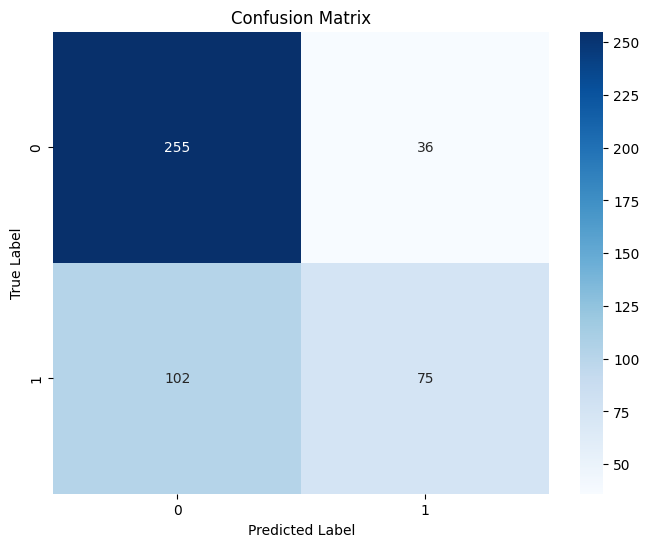

In [52]:
# As seen by the confusion matrix for SVC, still predicts 1 incorrectly, and majority predicts 0
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()